In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from datetime import datetime

In [2]:
omi_mls_mean_ds = xr.open_dataarray("/glade/u/home/mvoncyga/SOARS_2025/OMIMLS_300hpa_monthly_mean_2005_2024.nc")
omi_mls_stdev_ds = xr.open_dataarray("/glade/u/home/mvoncyga/SOARS_2025/OMIMLS_300hpa_monthly_stdev_2005_2024.nc")

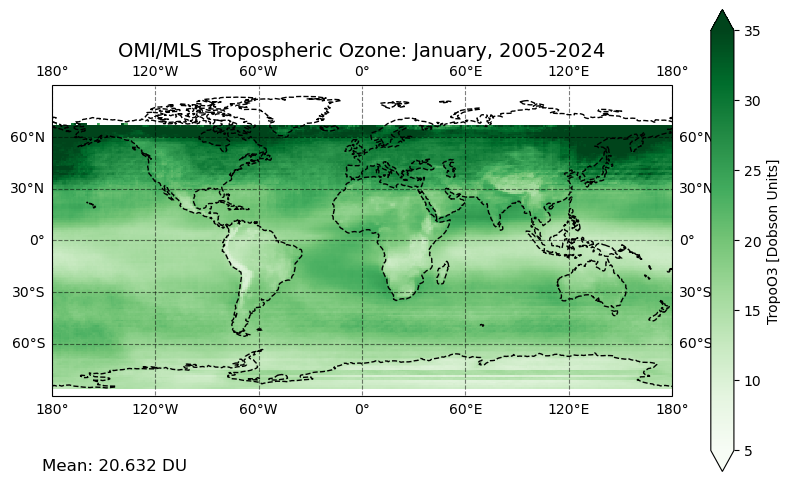

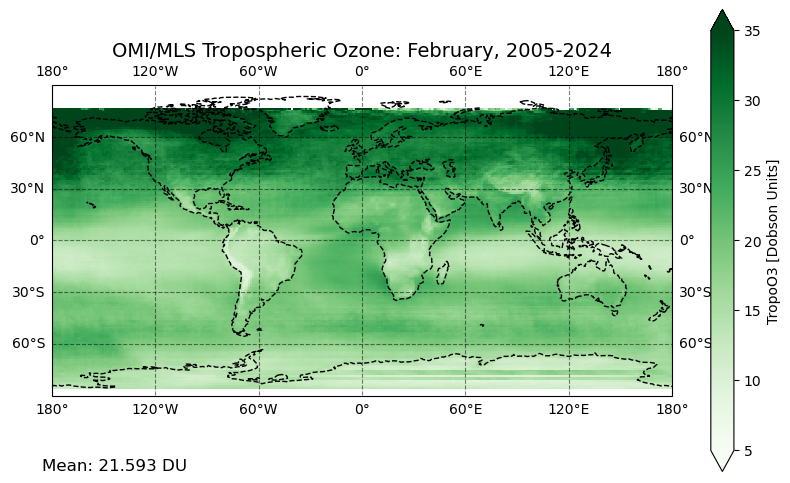

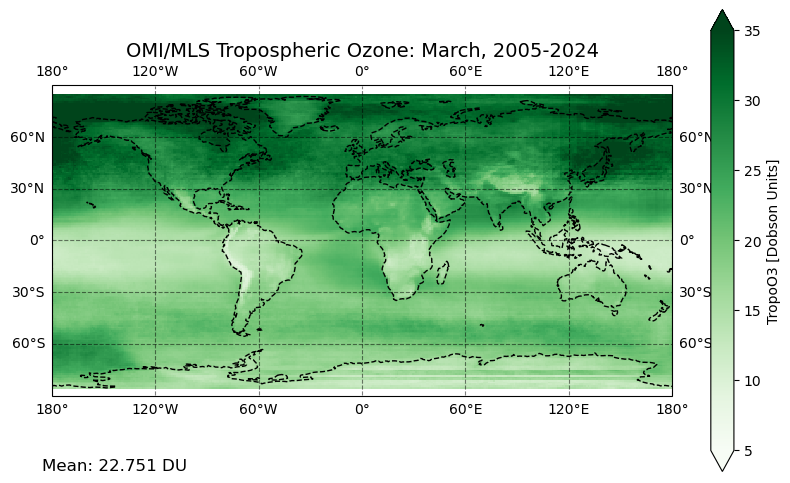

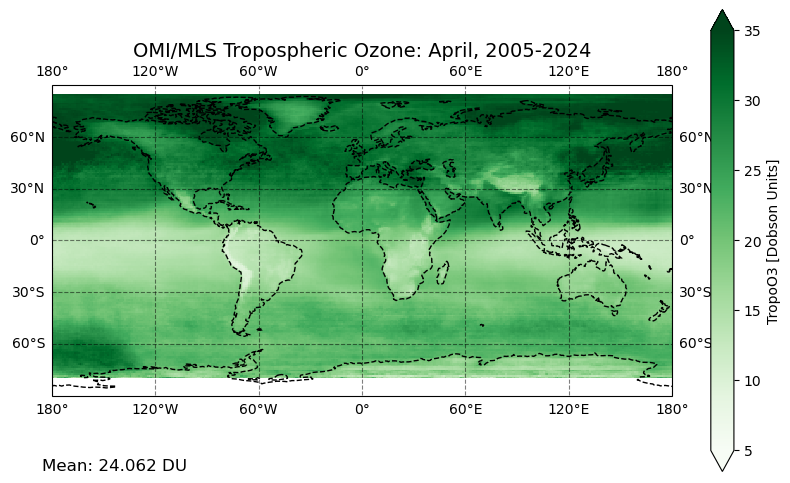

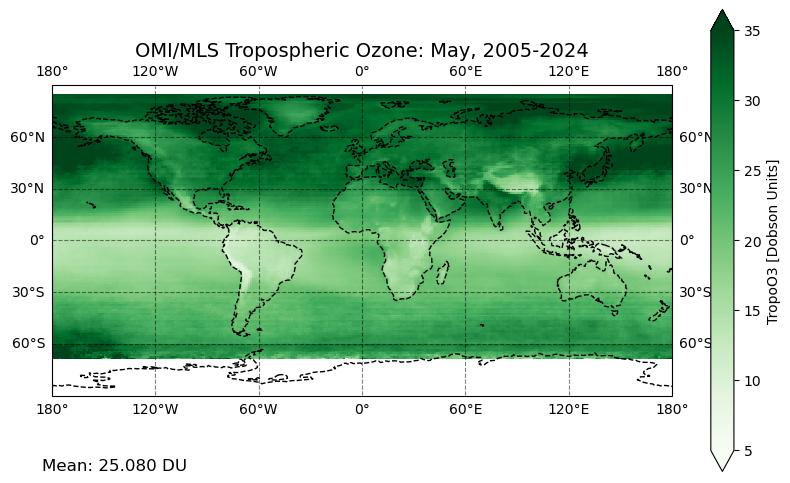

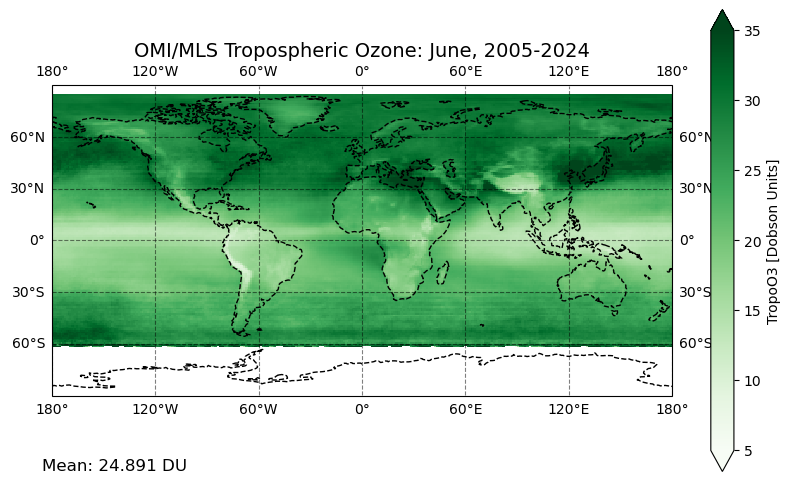

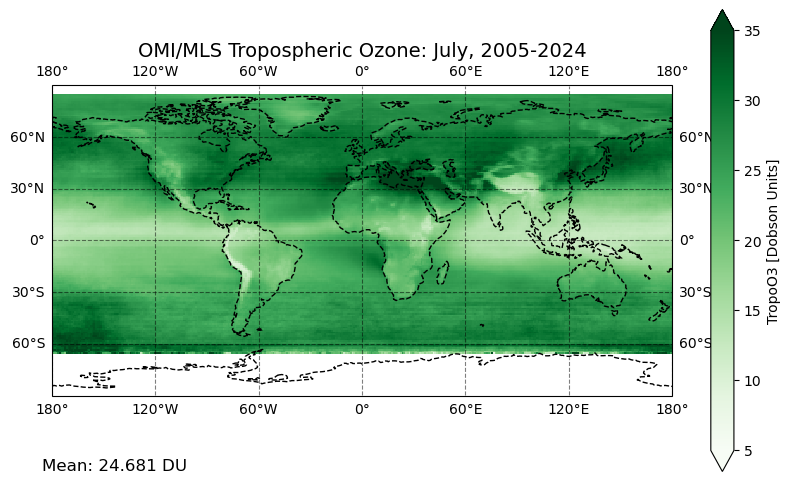

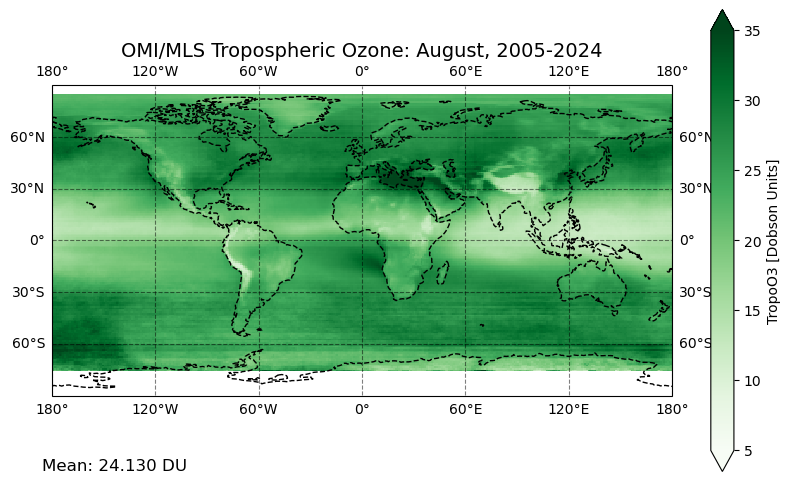

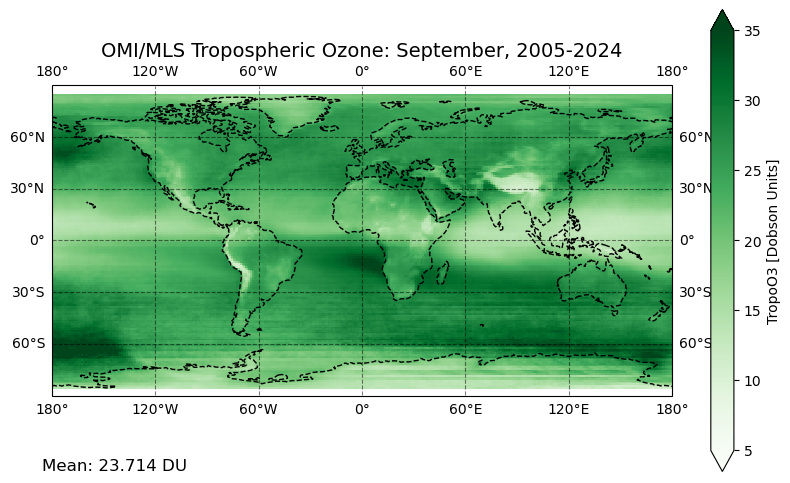

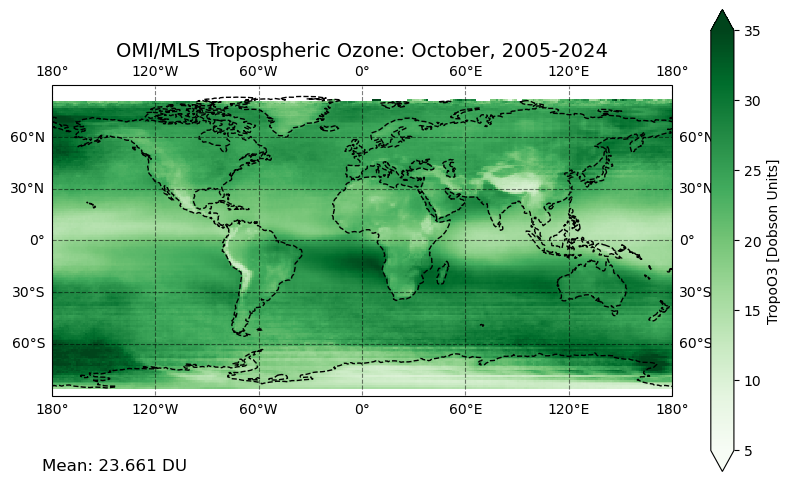

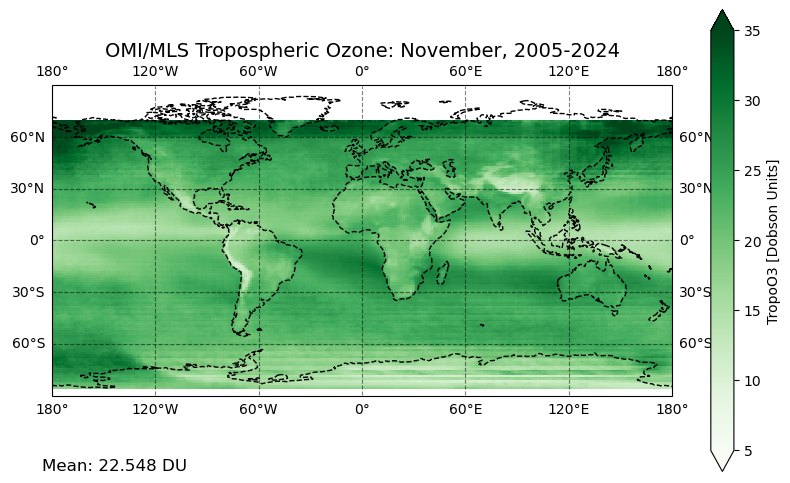

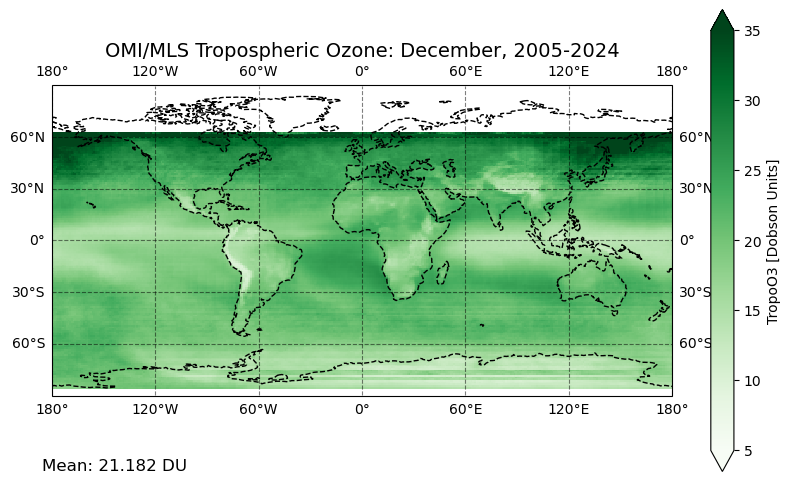

In [3]:
# plot the monthly means

month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
alphabet = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l'] # for cycling through figures to create a gif

i=0

for month in month_list:
    plt.figure(figsize=(10, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    omi_mls_mean_ds[i].plot(ax=ax,transform=ccrs.PlateCarree(central_longitude=0), 
                         x='longitude', y='latitude', vmin=5, vmax=35, extend='both', cmap='Greens')
    ax.add_feature(cfeature.COASTLINE, linestyle='--')
    ax.set_global()

    # adding gridlines
    ax.gridlines(draw_labels=True, color='black', alpha=0.5, linestyle='--')

    ax.set_title('OMI/MLS Tropospheric Ozone: ' + str(month) + ', 2005-2024', fontsize=14)
    formatted_mean = f"{omi_mls_mean_ds[i].mean().data:.3f}"

    ax.text(0.10, -0.25, 'Mean: ' + str(formatted_mean) + ' DU', va='bottom', ha='center',
            rotation='horizontal', rotation_mode='anchor',
            transform=ax.transAxes, fontsize=12)

    #plt.savefig("figures/Monthly_Mean_TropoO3-" + str(alphabet[i]))
    plt.show()
    i+=1

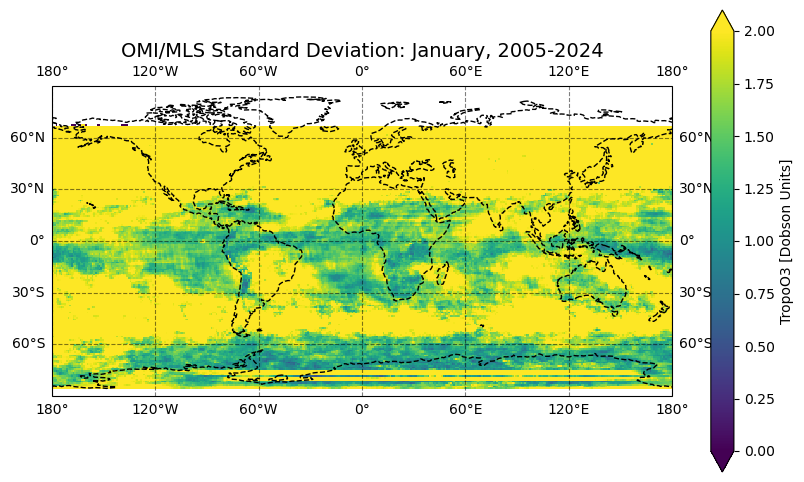

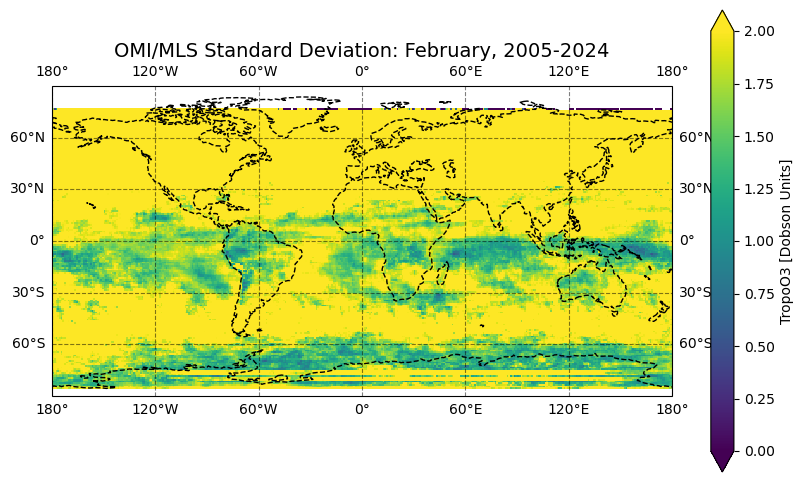

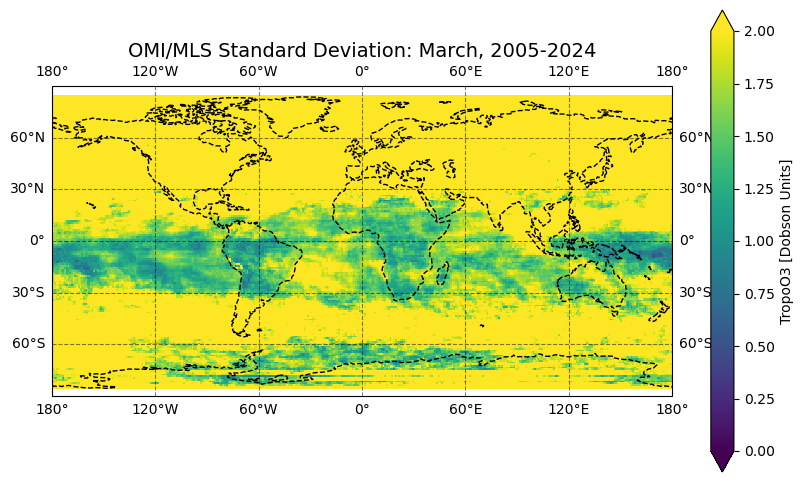

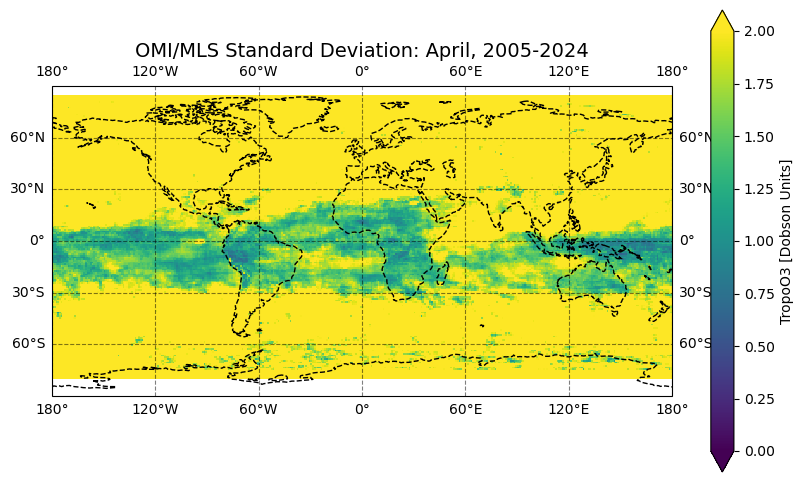

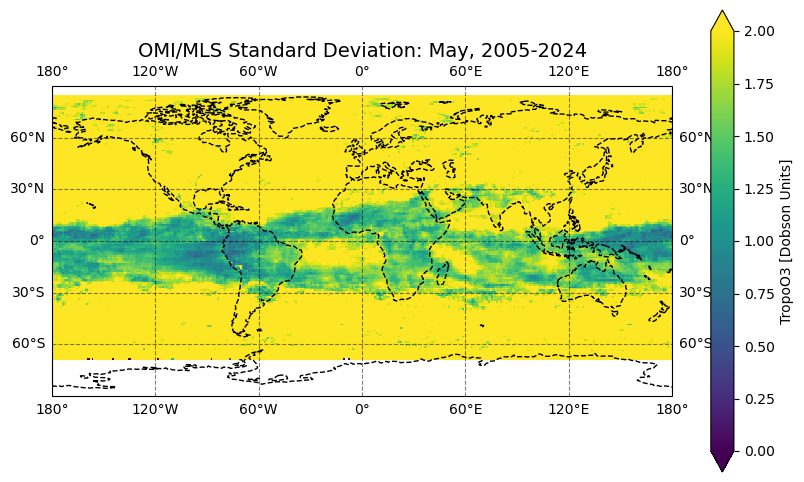

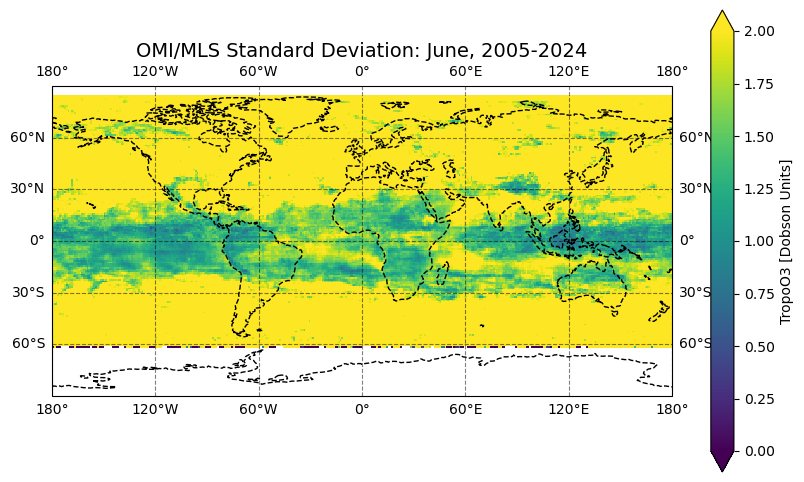

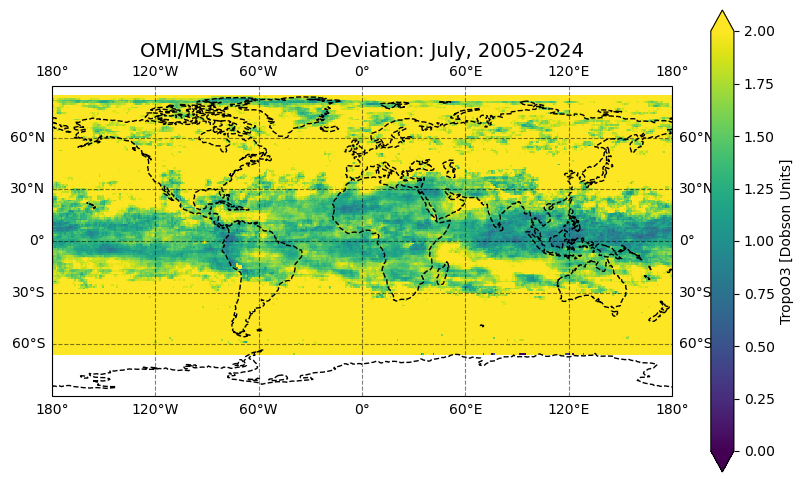

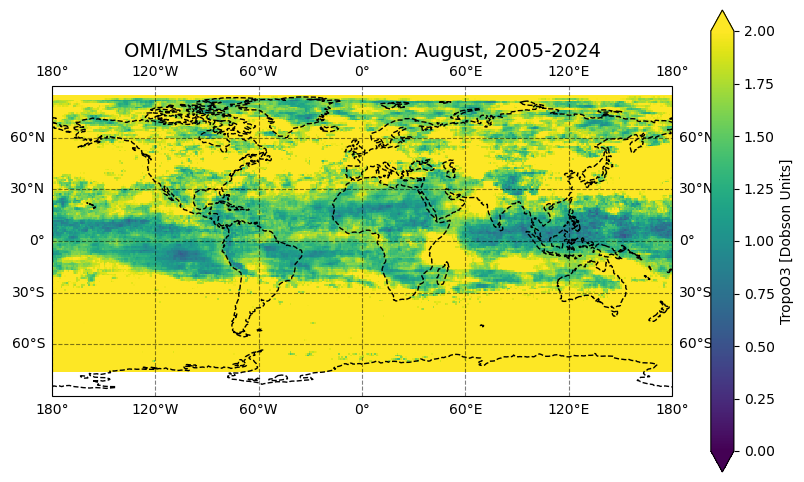

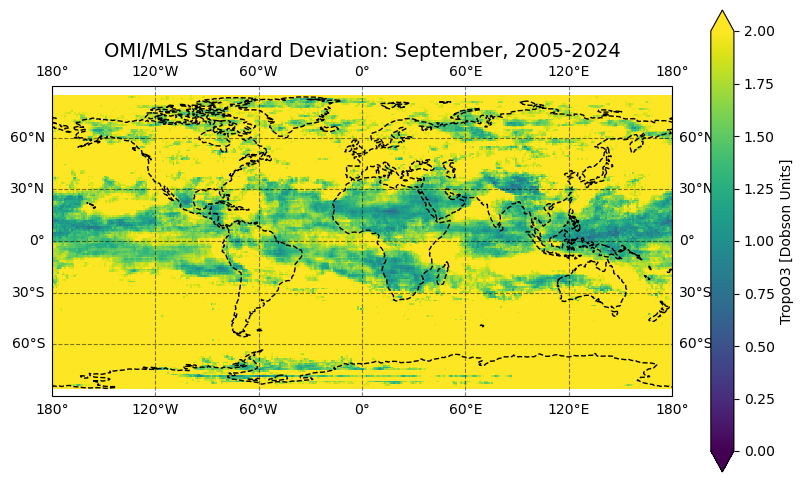

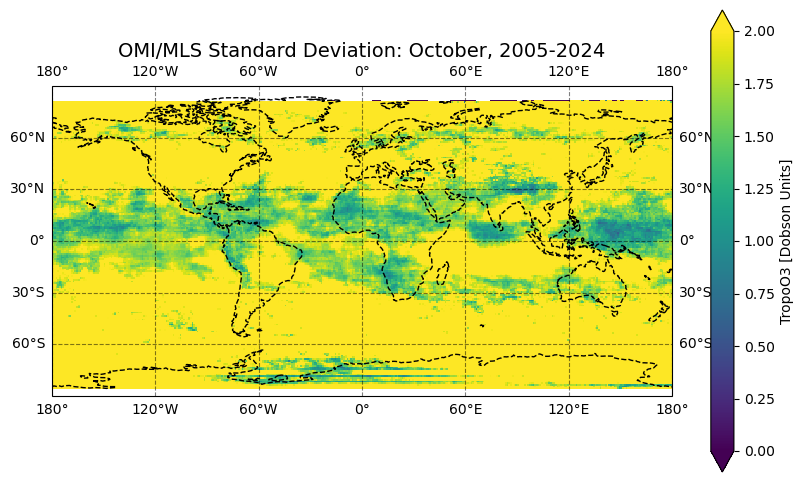

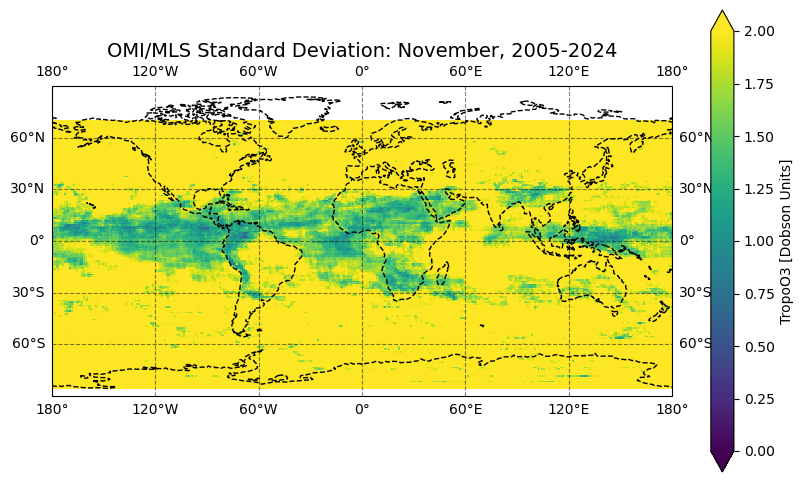

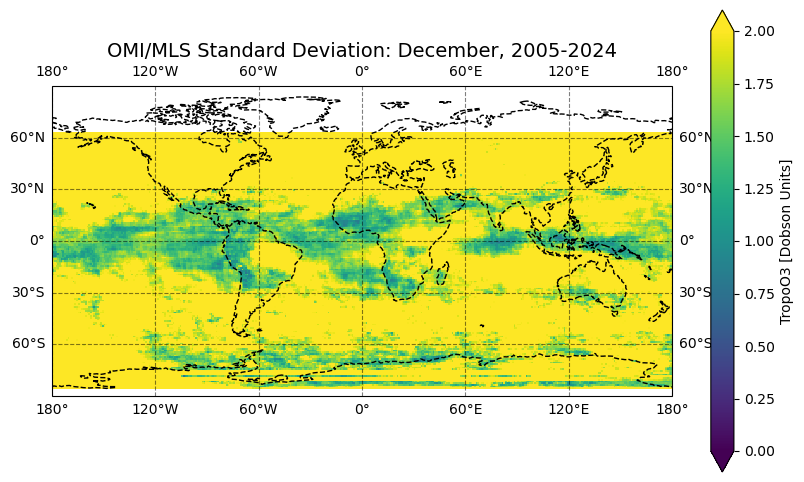

In [4]:
# plot the monthly standev

i=0
for month in month_list:
    plt.figure(figsize=(10, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    omi_mls_stdev_ds[i].plot(ax=ax,transform=ccrs.PlateCarree(central_longitude=0), 
                         x='longitude', y='latitude', vmin=0, vmax=2, extend='both')
    ax.add_feature(cfeature.COASTLINE, linestyle='--')
    ax.set_global()

    # adding gridlines
    ax.gridlines(draw_labels=True, color='black', alpha=0.5, linestyle='--')

    ax.set_title('OMI/MLS Standard Deviation: ' + str(month) + ', 2005-2024', fontsize=14)

    #plt.savefig("figures/Monthly_Standev_TropoO3-" + str(alphabet[i]))
    plt.show()
    i+=1

In [5]:
import imageio
import os

def create_gif(image_folder, output_gif, duration, file_name_locator):
    filenames = sorted([f for f in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, f))])
    images = []
    for filename in filenames:
        if filename.startswith(file_name_locator):
            image_path = os.path.join(image_folder, filename)
            images.append(imageio.imread(image_path))
    imageio.mimsave(output_gif, images, duration=duration)

image_dir = '/glade/u/home/mvoncyga/workspace/figures/'

#create_gif(image_dir, "TropoO3climatology_Mean.gif", duration=1000, "Monthly_Mean")
#create_gif(image_dir, "TropoO3climatology_Standev.gif", duration=1000, "Monthly_Standev")